In [1]:
import pandas as pd
import pyarrow
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor

In [39]:
X_train_03_14_1= pd.read_parquet("C:\\Users\\valif\\OneDrive\\Desktop\\SollIch-Hackathon_Daten\\SollIch-Hackathon_Daten\\Train_X\\2023_03_14_data.pq")[:20000]

X_train_03_14_1=X_train_03_14_1.drop('ProzessData_ActData_AB1_Temperature_DR1_WaterMixingStage', axis=1)

Y1_train_03_14_1=pd.read_parquet("C:\\Users\\valif\\OneDrive\\Desktop\\SollIch-Hackathon_Daten\\SollIch-Hackathon_Daten\\Train_Y\\2023_03_14_target.pq")[:20000]
X_test_03_16_1=pd.read_parquet("C:\\Users\\valif\\OneDrive\\Desktop\\SollIch-Hackathon_Daten\\SollIch-Hackathon_Daten\\Eval_X\\2023_03_16_data.pq")[:20000]

X_test_03_16_1=X_test_03_16_1.drop('ProzessData_ActData_AB1_Temperature_DR1_WaterMixingStage', axis=1)
Y1_test_03_16_1=pd.read_parquet("C:\\Users\\valif\\OneDrive\\Desktop\\SollIch-Hackathon_Daten\\SollIch-Hackathon_Daten\\Eval_Y\\2023_03_16_target.pq")[:20000]

In [40]:
X_train_03_14_2= pd.read_parquet("C:\\Users\\valif\\OneDrive\\Desktop\\SollIch-Hackathon_Daten\\SollIch-Hackathon_Daten\\Train_X\\2023_03_14_data.pq")[20000:50000]

X_train_03_14_2=X_train_03_14_2.drop('ProzessData_ActData_AB1_Temperature_DR1_WaterMixingStage', axis=1)

Y1_train_03_14_2=pd.read_parquet("C:\\Users\\valif\\OneDrive\\Desktop\\SollIch-Hackathon_Daten\\SollIch-Hackathon_Daten\\Train_Y\\2023_03_14_target.pq")[20000:50000]
X_test_03_16_2=pd.read_parquet("C:\\Users\\valif\\OneDrive\\Desktop\\SollIch-Hackathon_Daten\\SollIch-Hackathon_Daten\\Eval_X\\2023_03_16_data.pq")[20000:50000]

X_test_03_16_2=X_test_03_16_2.drop('ProzessData_ActData_AB1_Temperature_DR1_WaterMixingStage', axis=1)
Y1_test_03_16_2=pd.read_parquet("C:\\Users\\valif\\OneDrive\\Desktop\\SollIch-Hackathon_Daten\\SollIch-Hackathon_Daten\\Eval_Y\\2023_03_16_target.pq")[20000:50000]

In [41]:
X_train_03_14_3= pd.read_parquet("C:\\Users\\valif\\OneDrive\\Desktop\\SollIch-Hackathon_Daten\\SollIch-Hackathon_Daten\\Train_X\\2023_03_14_data.pq")[50000:]

X_train_03_14_3=X_train_03_14_3.drop('ProzessData_ActData_AB1_Temperature_DR1_WaterMixingStage', axis=1)

Y1_train_03_14_3=pd.read_parquet("C:\\Users\\valif\\OneDrive\\Desktop\\SollIch-Hackathon_Daten\\SollIch-Hackathon_Daten\\Train_Y\\2023_03_14_target.pq")[50000:]
X_test_03_16_3=pd.read_parquet("C:\\Users\\valif\\OneDrive\\Desktop\\SollIch-Hackathon_Daten\\SollIch-Hackathon_Daten\\Eval_X\\2023_03_16_data.pq")[50000:]

X_test_03_16_3=X_test_03_16_3.drop('ProzessData_ActData_AB1_Temperature_DR1_WaterMixingStage', axis=1)
Y1_test_03_16_3=pd.read_parquet("C:\\Users\\valif\\OneDrive\\Desktop\\SollIch-Hackathon_Daten\\SollIch-Hackathon_Daten\\Eval_Y\\2023_03_16_target.pq")[50000:]

In [64]:
dt=DecisionTreeRegressor()
dt.fit(X_train_03_14_3,Y1_train_03_14_3)
y_pred=dt.predict(X_test_03_16_3)

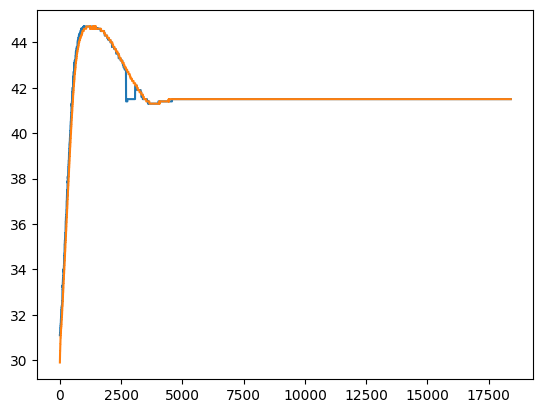

In [65]:
plt.plot(y_pred)
plt.plot(Y1_train_03_14_3.to_numpy())

In [54]:
def weighted_absolute_error(y_pred,y_true):
    points=0
    for i in range(len(y_true)):
        error=abs(y_pred[i]-y_true[i])
        if 0<=error<=0.05:
            points+=1
        elif 0.05<error<=0.1:
            points+=0.5
        elif 0.1<error<=0.5:
            points+=0.25
        else:
            points+=0
    
    return points


In [58]:
wae1=weighted_absolute_error(y_pred, Y1_test_03_16_1.to_numpy())

In [59]:
wae1

17828.25

In [63]:
wae2=weighted_absolute_error(y_pred, Y1_test_03_16_2.to_numpy())

In [66]:
wae3=weighted_absolute_error(y_pred, Y1_test_03_16_3.to_numpy())

In [67]:
wae1+wae2+wae3

55813.75

In [24]:
from sklearn.neighbors import KNeighborsRegressor

In [32]:
knn=KNeighborsRegressor()
knn.fit(X_train_03_14_3, Y1_train_03_14_3)
y_pred_knn=knn.predict(X_test_03_16_3)

In [29]:
wae1_knn=weighted_absolute_error(y_pred_knn, Y1_test_03_16_1.to_numpy())

In [31]:
wae2_knn=weighted_absolute_error(y_pred_knn, Y1_test_03_16_2.to_numpy())

In [33]:
wae3_knn=weighted_absolute_error(y_pred_knn, Y1_test_03_16_3.to_numpy())

In [34]:
wae1_knn+wae2_knn+wae3_knn

52598.75